In [1]:
import numpy as np
from pyedflib import highlevel
import pyedflib as plib
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from utils import set_root
set_root()

Current working directory: /home/manni/physioex


In [3]:
path = "example_records/ST7011J0-PSG.edf"
signals, signal_headers, header = highlevel.read_edf(path)
len(signals), len(signal_headers)

(5, 5)

In [31]:
signal_headers

[{'label': 'EEG Fpz-Cz',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EEG Pz-Oz',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EOG horizontal',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 8191,
  'digital_min': -8192,
  'prefilter': 'LP:800Hz HP:0.03Hz',
  'transducer': 'Ag-AgCl electrodes'},
 {'label': 'EMG submental',
  'dimension': 'uV',
  'sample_rate': 100.0,
  'sample_frequency': 100.0,
  'physical_max': 3000.0,
  'physical_min': -3000.0,
  'digital_max': 

In [75]:
path = "example_records/ST7011JP-Hypnogram.edf"
_, _, dict = highlevel.read_edf(path)
annotations = dict['annotations']

In [105]:
annotations[0:100]


[[0.0, 1560.0, 'Sleep stage W'],
 [1560.0, 90.0, 'Sleep stage 1'],
 [1650.0, 570.0, 'Sleep stage 2'],
 [2220.0, 120.0, 'Sleep stage 1'],
 [2340.0, 60.0, 'Sleep stage 2'],
 [2400.0, 60.0, 'Sleep stage 3'],
 [2460.0, 30.0, 'Sleep stage 1'],
 [2490.0, 150.0, 'Sleep stage 2'],
 [2640.0, 90.0, 'Sleep stage 3'],
 [2730.0, 30.0, 'Sleep stage 2'],
 [2760.0, 30.0, 'Sleep stage 1'],
 [2790.0, 90.0, 'Sleep stage 2'],
 [2880.0, 120.0, 'Sleep stage W'],
 [3000.0, 60.0, 'Sleep stage 1'],
 [3060.0, 240.0, 'Sleep stage 2'],
 [3300.0, 240.0, 'Sleep stage W'],
 [3540.0, 60.0, 'Sleep stage 2'],
 [3600.0, 30.0, 'Sleep stage 3'],
 [3630.0, 30.0, 'Sleep stage 2'],
 [3660.0, 60.0, 'Sleep stage 1'],
 [3720.0, 90.0, 'Sleep stage W'],
 [3810.0, 120.0, 'Sleep stage 1'],
 [3930.0, 30.0, 'Sleep stage 2'],
 [3960.0, 60.0, 'Sleep stage 1'],
 [4020.0, 60.0, 'Sleep stage 2'],
 [4080.0, 90.0, 'Sleep stage 1'],
 [4170.0, 90.0, 'Sleep stage W'],
 [4260.0, 30.0, 'Sleep stage 1'],
 [4290.0, 150.0, 'Sleep stage 2'],
 [4440.

In [122]:
def plot_raw_signal(start, finish, title):
    #EEG Fpz-Cz
    signal_to_plot = signals[0][start*100:finish*100]
    for annotation in annotations:
        if start >= annotation[0] and finish <= annotation[0]+annotation[1]:
            print("corresponding annotation: ", annotation[2])

    t = np.linspace(0, 10, 1000)
    plt.figure(figsize=(10, 4))  # Define figure size
    sns.lineplot(x=t, y=signal_to_plot, color="b")
    
    # Labeling the plot
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Micro Volt [uV]')
    plt.ylim(+150, -150)

    # Display the plot
    plt.show()

corresponding annotation:  Sleep stage W


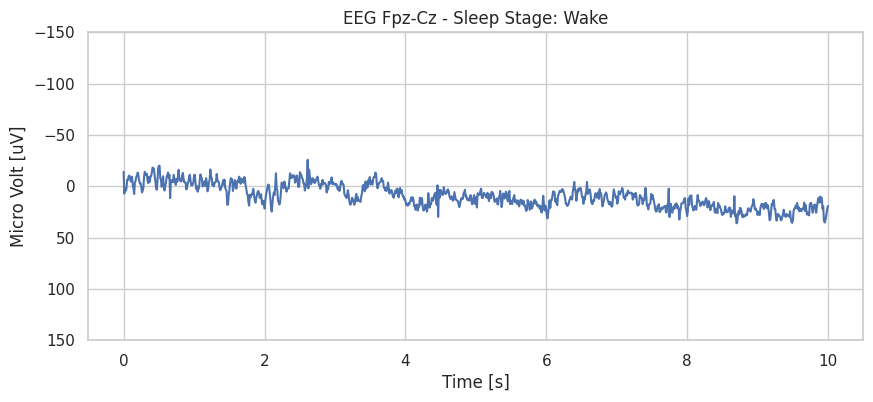

In [124]:
plot_raw_signal(160, 170, "EEG Fpz-Cz - Sleep Stage: Wake")

corresponding annotation:  Sleep stage 1


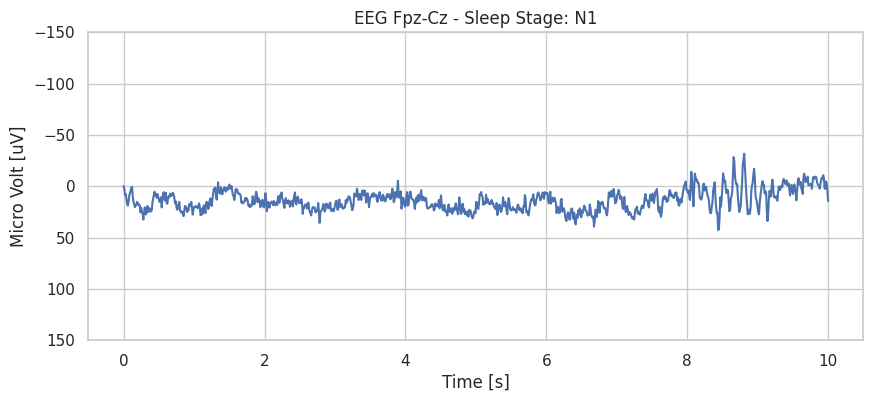

In [126]:
plot_raw_signal(2260, 2260+10, "EEG Fpz-Cz - Sleep Stage: N1")

corresponding annotation:  Sleep stage 1


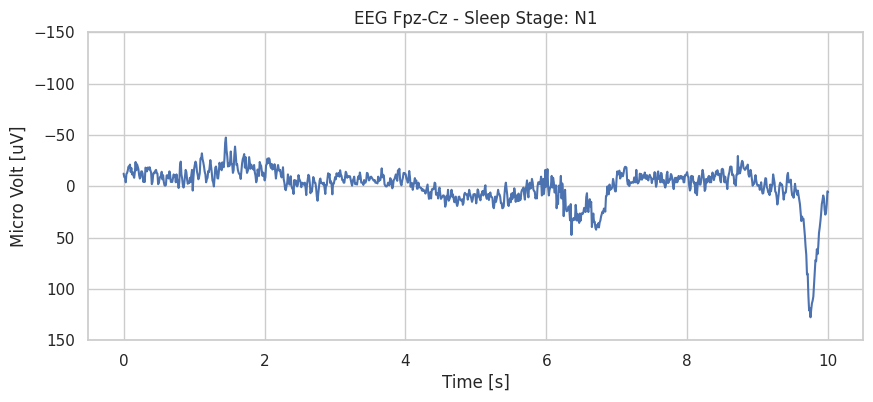

In [127]:
plot_raw_signal(2220, 2230, "EEG Fpz-Cz - Sleep Stage: N1")

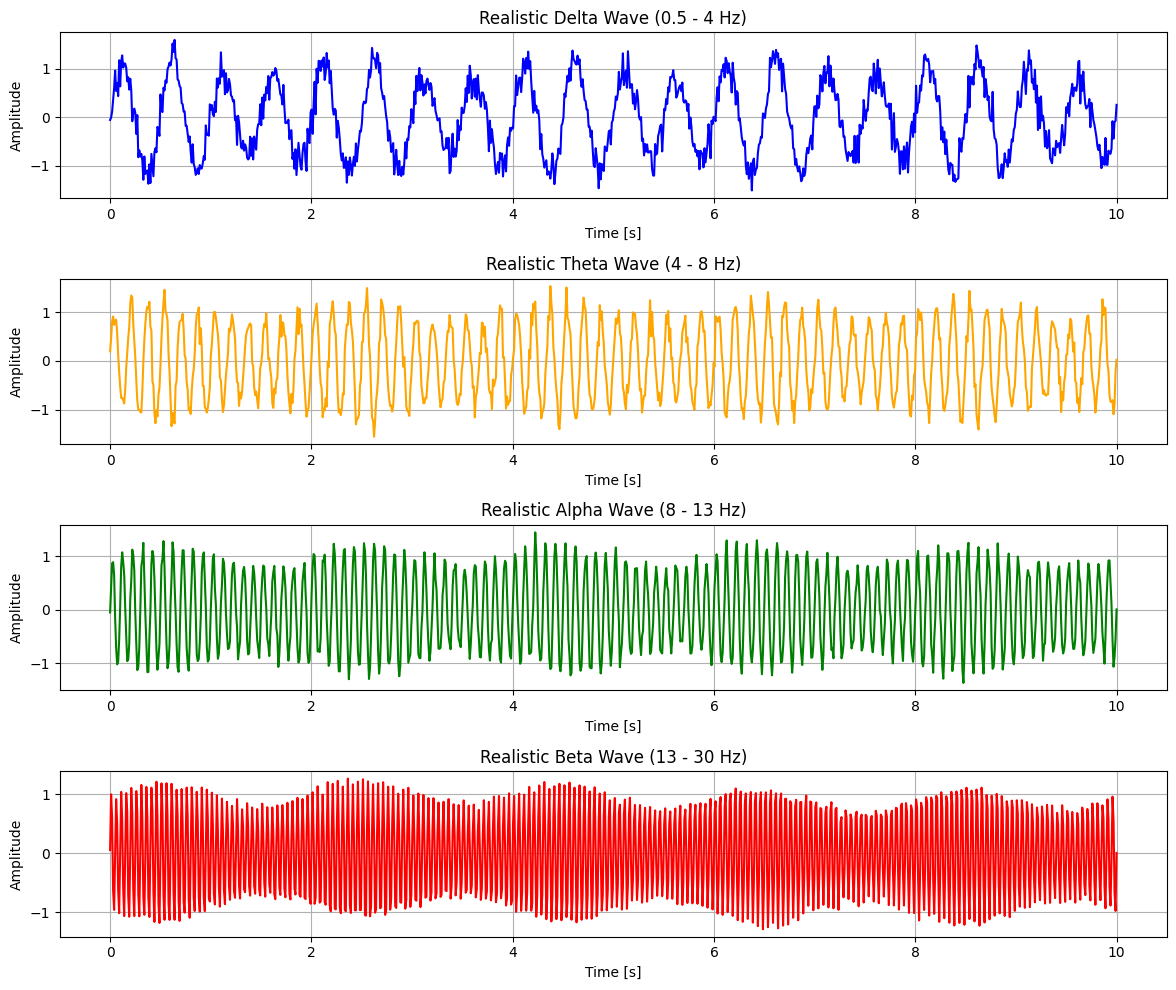

In [5]:
def generate_brain_wave(freq, time, noise_factor=0.1):
    """Genera un'onda cerebrale simulata con frequenza variabile e rumore casuale"""
    # Genera una sinusoide con variazioni nella frequenza
    wave = np.sin(2 * np.pi * freq * time)
    
    # Aggiunge rumore casuale per renderla più realistica
    noise = noise_factor * np.random.randn(len(time))
    
    # Modula leggermente l'ampiezza per simulare variazioni naturali
    amplitude_modulation = 1 + 0.2 * np.sin(2 * np.pi * 0.5 * time)
    
    # Restituisce l'onda modulata con rumore
    return amplitude_modulation * wave + noise

def plot_realistic_brain_waves():
    # Definiamo il tempo
    t = np.linspace(0, 10, 1000)  # 30 secondi di campionamento a 100 Hz
    
    # Definiamo le frequenze caratteristiche per ogni onda
    delta_freq = 2  # Hz (tipicamente tra 0.5 e 4 Hz)
    theta_freq = 6  # Hz (tipicamente tra 4 e 8 Hz)
    alpha_freq = 10  # Hz (tipicamente tra 8 e 13 Hz)
    beta_freq = 20  # Hz (tipicamente tra 13 e 30 Hz)
    
    # Generiamo le onde cerebrali con rumore e modulazione
    delta_wave = generate_brain_wave(delta_freq, t, noise_factor=0.2)
    theta_wave = generate_brain_wave(theta_freq, t, noise_factor=0.15)
    alpha_wave = generate_brain_wave(alpha_freq, t, noise_factor=0.1)
    beta_wave = generate_brain_wave(beta_freq, t, noise_factor=0.05)
    
    # Impostiamo il plot
    plt.figure(figsize=(12, 10))
    
    # Plottiamo l'onda Delta
    plt.subplot(4, 1, 1)
    plt.plot(t, delta_wave, color='blue')
    plt.title('Realistic Delta Wave (0.5 - 4 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plottiamo l'onda Theta
    plt.subplot(4, 1, 2)
    plt.plot(t, theta_wave, color='orange')
    plt.title('Realistic Theta Wave (4 - 8 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plottiamo l'onda Alpha
    plt.subplot(4, 1, 3)
    plt.plot(t, alpha_wave, color='green')
    plt.title('Realistic Alpha Wave (8 - 13 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plottiamo l'onda Beta
    plt.subplot(4, 1, 4)
    plt.plot(t, beta_wave, color='red')
    plt.title('Realistic Beta Wave (13 - 30 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Miglioriamo la disposizione
    plt.tight_layout()
    
    # Mostriamo il plot
    plt.show()

# Esegui la funzione per vedere il plot
plot_realistic_brain_waves()